In [87]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import csv
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

In [88]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [89]:
#read csv files
df = pd.read_csv('../data/processed/pre-processed.csv')
df.head()

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,0,40,3,3,1,0,1,1,0,...,30,69,33,1,1,0,0,0,0,0
1,1,1,5,0,3,4,0,1,1,0,...,24,53,33,0,0,0,0,0,0,0
2,2,2,54,3,1,2,3,1,1,0,...,17,67,33,0,1,0,1,0,1,0
3,3,3,40,2,0,4,0,1,0,1,...,18,59,18,1,0,0,1,1,1,0
4,4,4,43,3,1,2,0,1,1,0,...,21,65,26,0,0,0,0,0,0,0


In [90]:
X = df.drop(['classification'],axis=1)
y = df['classification']

In [91]:
y.value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [113]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,Y_train)

y_predi=clf.predict(X_test)

In [94]:
AccR=accuracy_score(Y_test, y_predi)

In [95]:
print(AccR)

1.0


In [96]:
from sklearn.metrics import accuracy_score

print('Accuracy of the training dataset: ',format(clf.score(X_train,Y_train)))
print('Accuracy of the testing dataset: ',format(accuracy_score(Y_test,prediction)))

Accuracy of the training dataset:  1.0
Accuracy of the testing dataset:  0.9583333333333334


In [97]:
from sklearn.metrics import classification_report

cr = classification_report(Y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        70
           1       0.91      1.00      0.95        50

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [98]:
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,Y_train)
# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 1


In [99]:
y_predict=model.predict(X_test)

In [100]:
AccD=accuracy_score(Y_test, y_predict)

In [101]:
print(AccD)

0.9916666666666667


In [102]:
from sklearn.metrics import accuracy_score

print('Accuracy of the training dataset: ',format(model.score(X_train,Y_train)))
print('Accuracy of the testing dataset: ',format(accuracy_score(Y_test,y_predict)))

Accuracy of the training dataset:  1.0
Accuracy of the testing dataset:  0.9916666666666667


In [103]:
from sklearn.metrics import classification_report

cr = classification_report(Y_test,y_predi)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [104]:
Nb = GaussianNB()

#Train the model using the training sets
Nb.fit(X_train,Y_train)

#prediction
prediction=Nb.predict(X_test)

In [105]:
AccNB=accuracy_score(Y_test, prediction)

In [106]:
print(AccNB)

0.9583333333333334


In [107]:
from sklearn.metrics import accuracy_score

print('Accuracy of the training dataset: ',format(Nb.score(X_train,Y_train)))
print('Accuracy of the testing dataset: ',format(accuracy_score(Y_test,prediction)))


Accuracy of the training dataset:  0.9678571428571429
Accuracy of the testing dataset:  0.9583333333333334


In [108]:
from sklearn.metrics import classification_report

cr = classification_report(Y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        70
           1       0.91      1.00      0.95        50

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [109]:
newdf = pd.DataFrame({'RandomForest': AccR*100.0, 'DecisionTree':AccD*100.0,'NaiveBayes':AccNB*100.0},index=[0])

In [110]:
newdf

,RandomForest,DecisionTree,NaiveBayes
0,100.0,99.166667,95.833333


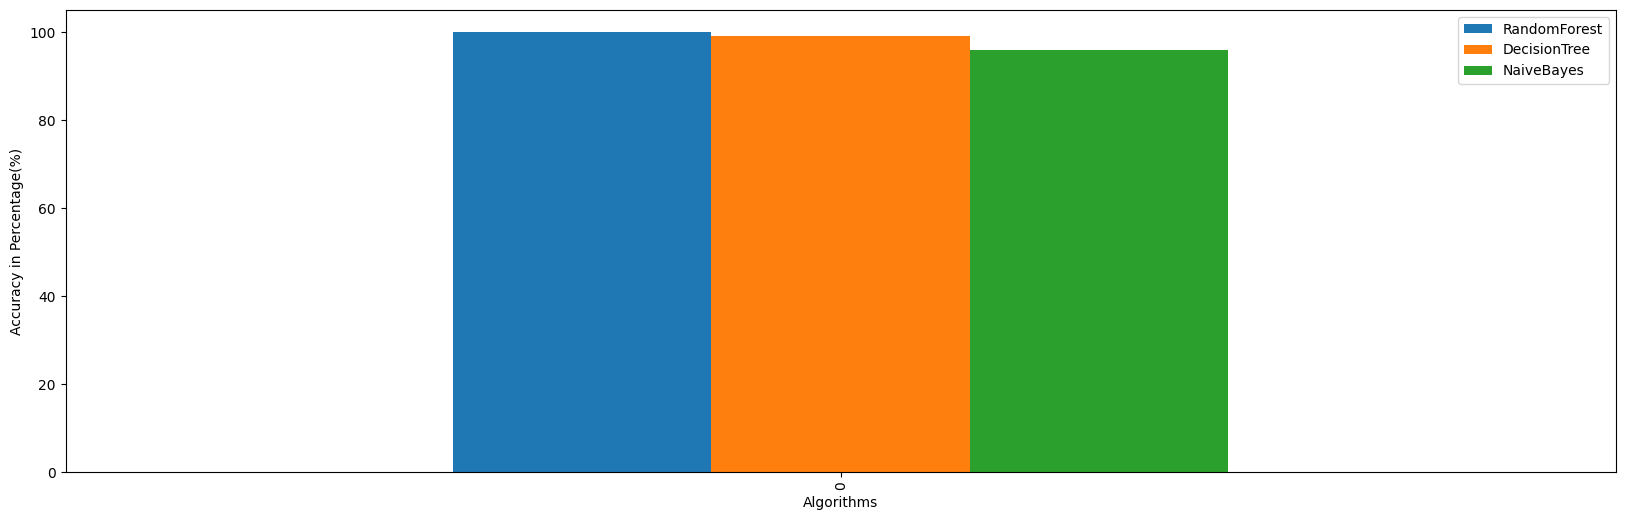

In [111]:
df1 = newdf
df1.plot(kind='bar',figsize=(20,6))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy in Percentage(%)')
plt.show()